# Logistic Regression with Gradient Descent

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing Dataset

In [2]:
X_train = np.array([[0.08, 0.72], [0.26, 0.58], [0.45, 0.15], [0.60, 0.30],[0.10, 1.0], [0.35, 0.95], [0.70, 0.65], [0.92, 0.45]])
y_train = np.array([1, 1, 1, 1, 0, 0, 0, 0])
X_test = np.array([[0.10, 0.9], [0.4, 0.2], [0.8, 0.5], [0.2, 0.6]])

data = pd.DataFrame({
    'X1': X_train[:, 0],
    'X2': X_train[:, 1],
    'y': y_train
})

data

,X1,X2,y
0,0.08,0.72,1
1,0.26,0.58,1
2,0.45,0.15,1
3,0.60,0.30,1
4,0.10,1.00,0
5,0.35,0.95,0
6,0.70,0.65,0
7,0.92,0.45,0


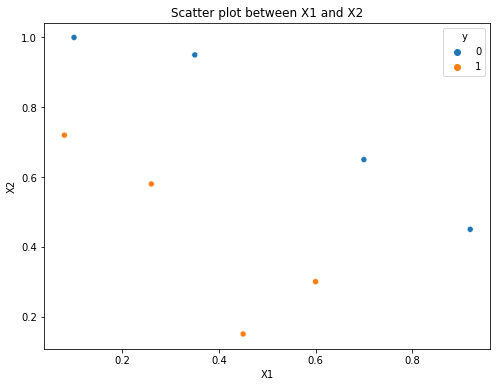

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='X1', y='X2', hue='y')
plt.title('Scatter plot between X1 and X2')
plt.show()

## Modelling

In [27]:
class LogReg_GD:
    def __init__(self, n_Var):
        self.bias = 0
        self.weight = np.random.randn(n_Var)
    
    def sigmoid_function(self, z):
        return 1/(1+np.exp(-z))

    def predict(self, weight, X, bias):
        y_prediction = self.sigmoid_function(np.array(np.dot(X, weight) + bias))
        return y_prediction

    def cost_function(self, X, y, y_prediction):
        m =  X.shape[0]
        return (-1/m)*np.sum(y*np.log(y_prediction) + (1-y)*np.log(1-y_prediction))
    
    def derivative_weight(self, y_prediction, y, X, learning_rate):
        dw = np.dot((y_prediction - y), X)
        return self.weight - (learning_rate * dw)
    
    def derivative_bias(self, y_prediction, y, learning_rate):
        db = np.sum(y_prediction - y)
        return self.bias - (learning_rate * db)
    
    def gradient_descent(self, X, y, epochs, learning_rate):
        loss = []

        for _ in range(epochs):
            y_prediction = self.predict(self.weight, X, self.bias)
            self.weight = self.derivative_weight(y_prediction, y, X, learning_rate)
            self.bias = self.derivative_bias(y_prediction, y, learning_rate)
            loss.append(self.cost_function(X, y, y_prediction))
        
        return loss

In [32]:
lr_candidate = [0.1, 0.5, 1]
loss_list = []

for lr in lr_candidate:
    model = LogReg_GD(X_train.shape[1])
    epochs = 15000
    loss = model.gradient_descent(X_train, y_train, epochs, lr)
    print(f'Learning Rate : {lr}')
    print(f'Weight : {model.weight}')
    print(f'Bias : {model.bias}')
    loss_list.append([lr, loss])

Learning Rate : 0.1
Weight : [-19.75089636 -27.57612576]
Bias : 25.577046239591596
Learning Rate : 0.5
Weight : [-26.62624578 -37.53817571]
Bias : 34.74673828208319
Learning Rate : 1
Weight : [-29.63645102 -41.91317775]
Bias : 38.77132748726733


### Visualizing the loss

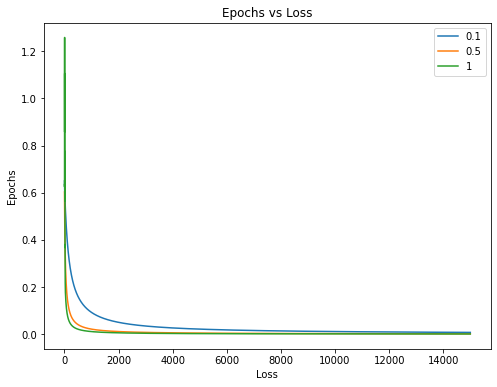

In [34]:
plt.figure(figsize=(8, 6))
for i in range(len(loss_list)):
    plt.plot(np.arange(1, epochs), loss_list[i][1][1:], label=loss_list[i][0])

plt.title('Epochs vs Loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

> Dari visualisasi di atas, bisa dilihat bahwa learning rate 1 menghasilkan loss (cost function) yang mendekati 0, iterasi berikutnya bakal memiliki nilai loss yang mirip.

## Constructing the final Model

In [35]:
model = LogReg_GD(X_train.shape[1])
epochs = 15000
learning_rate = 1
model.gradient_descent(X_train, y_train, epochs, 1)
print(f'Weight : {model.weight}')
print(f'Bias : {model.bias}')

Weight : [-29.63569271 -41.91207465]
Bias : 38.770312842009


## Prediction using the Model

Kita telah melakukan training **Logistic Regression** model kita dan juga dioptimisasi dengan **Gradient Descent**, Setelah itu kita juga ingin melakukan predict untuk melihat hasil y prediction kita menggunakan model tersebut. Namun, hasil y prediction ini yang telah menggunakan sigmoid function menghasilkan value berupa probability antara 0 hingga 1, sehingga kita membutuhkan **Threshold** Untuk mengubah value tersebut menjadi hanya 0 dan 1 dengan batas threshold berupa 0.5

In [38]:
def threshold(y):
    return [1 if i >= 0.5 else 0 for i in y]

## Comparison

- y value with y prediction on training data

In [49]:
y_prediction_probability = model.predict(model.weight, X_train, model.bias)
y_prediction_threshold = threshold(y_prediction_probability)
data_pred_train = pd.DataFrame({
    'Ground Truth': y_train,
    'Prediction': y_prediction_threshold,
    'Prediction Probability': y_prediction_probability
})

data_pred_train

,Ground Truth,Prediction,Prediction Probability
0,1,1,0.998020
1,1,1,0.998838
2,1,1,1.000000
3,1,1,0.999779
4,0,0,0.002226
5,0,0,0.000011
6,0,0,0.000099
7,0,0,0.000639


> Dari sini, bisa dilihat bahwa model kita bekerja dengan baik terhadap training data.

### Cost Function

In [50]:
def cost_function(X, y, y_prediction):
    m = X.shape[0]
    return (-1/m)*np.sum(y*np.log(y_prediction) + (1-y)*np.log(1-y_prediction))

print(f'Cost Value on Training Data : {cost_function(X_train, y_train, y_prediction_probability)}')

Cost Value on Training Data : 0.0007930411623265523


### Visualizing the boundary on Training Data

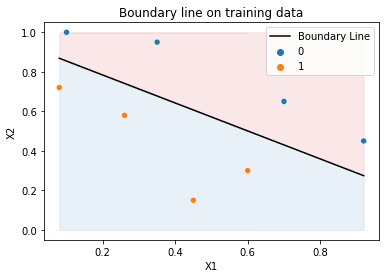

In [51]:
boundary_line = ((-model.weight[0]/model.weight[1])*X_train[:, 0] + (-model.bias/model.weight[1]))

sns.lineplot(x=X_train[:,0], y=boundary_line, color='black', label='Boundary Line')
plt.fill_between(X_train[:, 0], boundary_line, 1, color = 'tab:red', alpha = 0.1)
plt.fill_between(X_train[:,0], boundary_line, 0, color = 'tab:blue', alpha = 0.1)
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Boundary line on training data')
plt.show()

> Model kita sudah bagus, terlihat bahwa boundary line bisa memisahkan kelas 0 dan 1 dengan baik

### Visualizing the boundary on Test Data

In [52]:
y_test_probability = model.predict(model.weight, X_test, model.bias)
y_test_threshold = threshold(y_test_probability)
data_pred_test = pd.DataFrame({
    'Prediction': y_test_threshold,
    'Prediction Probability': y_test_probability
})

data_pred_test

,Prediction,Prediction Probability
0,0,0.128518
1,1,1.000000
2,0,0.002748
3,1,0.999546


> Model ini juga bekerja dengan baik di test data, namun kita coba lihat visualisasinya.

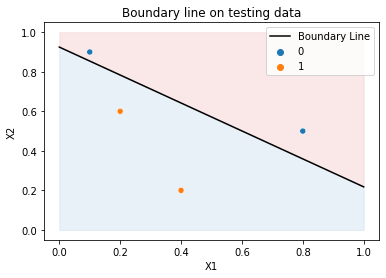

In [72]:
x_line = np.array([0,1])
boundary_line = ((-model.weight[0]/model.weight[1])*x_line + (-model.bias/model.weight[1]))

sns.lineplot(x=x_line, y=boundary_line, color='black', label='Boundary Line')
plt.fill_between(x_line, boundary_line, 1, color = 'tab:red', alpha = 0.1)
plt.fill_between(x_line, boundary_line, 0, color = 'tab:blue', alpha = 0.1)
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test_threshold)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Boundary line on testing data')
plt.show()

> Dari visualisasi di atas, sudah terbukti bahwa model kita bekerja dengan baik, ini bisa dilihat bahwa di test data, model ini mampu mengklasifikasikan kelas 0 dan 1 dengan adanya Boundary Line tersebut.